# Diabetic Foot Ulcer
## Shallow Learning Approach v2.0


Todo
- [ ] Dataset Organisation
- [ ] Feature Extraction
- [ ] Classification
- [ ] Clustering

# Something About The Dataset

## Foot Plantar Dataset

Consist of two groups
1. Control Group : Do not have Diabetic Foot Ulcer.
2. Diabetic Group: Those Who Do Have Diabeties

Each Group Have Their foot thermograms

- [Link To Dataset IEEE Dataport]()

# Part 1: Data Exploration

In [2]:
# Helper Functions
from IPython.display import HTML

import warnings

with warnings.catch_warnings():
    warnings.simplefilter("ignore")

def printImages(title, paths, row_c):
    doc = ""
    con = 0
    ss = "<td><img src=\"%s\">%s</img></td>"
    rows = ""
    for path in paths:
        path = "/".join(path.split("/")[-3:])
        rows += ss%(path, path.split("/")[-1])
        con += 1
        if con % row_c == 0 :
            doc += "<tr>%s</tr>"%(rows)
            rows = ""
    if len(rows) > 0: doc += "<tr>%s</tr>"%(rows)


    html = """
    <!DOCTYPE html>
    <p>%s</p>
    <table>
    %s
    </table>
    """%(title, doc)

    display(HTML(html))
    

# Get Path Name
def path(name):
    return "ds/dfu_thermo_ds/%s"%name


# Convert To Grayscale

def rgb2gs(smpl):
    s_height, s_width, _ = smpl.shape
    grayscale =  [ [ [ 0, 0, 0 ]   for i in range(s_width) ] for _ in range(s_height)]
    
    for y in range(s_height):
        for x in range(s_width):
            r, g, b = smpl[y][x]
            # copied formula 
            gv = 0.299 * r + 0.587 * g + 0.114 * b
            grayscale[y][x] = [gv, gv, gv]
    grayscale = np.array(grayscale, dtype=np.uint8)
    return grayscale

def rgb2gs1(smpl):
    s_height, s_width, _ = smpl.shape
    grayscale =  [ [ 0   for i in range(s_width) ] for _ in range(s_height)]
    
    for y in range(s_height):
        for x in range(s_width):
            r, g, b = smpl[y][x]
            # copied formula 
            gv = 0.299 * r + 0.587 * g + 0.114 * b
            grayscale[y][x] = gv
    grayscale = np.array(grayscale, dtype=np.uint8)
    return grayscale

In [3]:
ds_path = "/home/someone/svnit/mtech/sem3/research/code/ds/dfu_thermo_ds/"
import os

thermograms_names = os.listdir(ds_path)
cg_thermograms_names = [ x for x in thermograms_names if x.startswith("CG") ]
dg_thermograms_names = [ x for x in thermograms_names if x.startswith("DM") ]

print("Control Group Subjects: ", len(cg_thermograms_names) / 2)
print("Diabetic Group Subjects: ", len(dg_thermograms_names) / 2)
print("Total Subjects: ", len(cg_thermograms_names) / 2 + len(dg_thermograms_names) / 2)

Control Group Subjects:  45.0
Diabetic Group Subjects:  122.0
Total Subjects:  167.0


In [4]:
# Some Random Images From Control Group
import numpy as np
import random

count = 20
random.seed(1337)
cg_sample = random.sample(cg_thermograms_names, count)


printImages("Random Images From Control Group", [ "ds/dfu_thermo_ds/%s"%x for x in cg_sample], 5)

CG036_M_R.png,CG033_M_R.png,CG012_F_L.png,CG007_F_L.png,CG036_M_L.png
CG004_F_R.png,CG030_M_R.png,CG018_M_R.png,CG037_M_R.png,CG002_M_R.png
CG018_M_L.png,CG020_F_L.png,CG013_M_L.png,CG041_F_R.png,CG017_F_L.png
CG003_M_R.png,CG022_M_R.png,CG042_F_L.png,CG003_M_L.png,CG024_F_R.png


In [5]:
# Some Random Images From Control Group
import numpy as np
import random

count = 20
random.seed(1337)
dg_sample = random.sample(dg_thermograms_names, count)


printImages("Random Images From Diabetic Group", [ "ds/dfu_thermo_ds/%s"%x for x in dg_sample], 5)

DM063_F_R.png,DM040_F_L.png,DM063_F_L.png,DM030_F_R.png,DM110_F_L.png
DM071_F_L.png,DM083_M_L.png,DM074_F_L.png,DM004_M_R.png,DM020_F_L.png
DM120_F_R.png,DM105_F_L.png,DM080_F_L.png,DM104_F_R.png,DM086_F_R.png
DM093_F_L.png,DM059_F_L.png,DM105_F_R.png,DM015_M_R.png,DM091_M_R.png


# Part 2: Feature Extraction From Images

Preprocessing

- [ ] Color to Grayscale Image


/home/someone/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "
/tmp/ipykernel_193580/1246274058.py:7: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img1 = img.imread(path(cg_thermograms_names[0]))


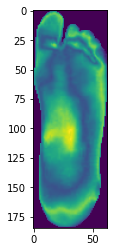

In [6]:
import matplotlib.pyplot as plt
import imageio as img




img1 = img.imread(path(cg_thermograms_names[0]))
img2 = rgb2gs1(img1)

plt.imshow(img2)



In [7]:
from skimage.feature import graycomatrix, graycoprops

def toglcm(gv_img):
    glcm = graycomatrix(
        img2, distances=[1], angles=[45], levels=256, symmetric=True, normed=False
    )
    return np.array(glcm, dtype=np.uint8).reshape(256, 256,)

toglcm(img2)[0]


array([100,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   2,   1,   0,   1,   1,   0,   1,
         1,   0,   1,   0,   2,   0,   0,   2,   1,   1,   0,   0,   1,
         0,   1,   2,   3,   1,   1,   1,   2,   2,   3,   1,   3,   3,
         3,   2,   4,   1,   3,   3,   2,   3,   4,   4,  12,   4,   2,
         5,   1,   3,   1,   1,   4,   5,   2,   3,   5,   5,   8,   4,
         3,   5,   2,   6,   6,   4,   6,   4,   8,   4,   6,   6,   8,
         2,   2,   3,   3,   1,   5,   8,  12,   7,   3,   5,   6,   7,
         5,   6,   7,   9,  14,   5,   4,   5,   2,   3,   8,   7,   7,
         5,   2,   3,   1,   3,   2,   2,   2,   1,   3,   3,   2,   2,
         3,   5,   7,   7,   6,   3,   1,   5,   2,   2,   3,   3,   2,
         0,   2,   1,   2,   2,   1,   2,   0,   4,   2,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

/tmp/ipykernel_193580/1745600107.py:1: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  plt.imshow(toglcm(rgb2gs1(img.imread(path(dg_thermograms_names[150])))))


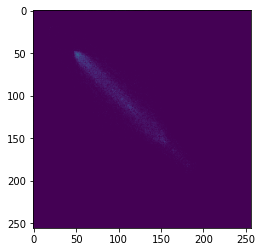

/tmp/ipykernel_193580/1745600107.py:3: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  plt.imshow(toglcm(rgb2gs1(img.imread(path(dg_thermograms_names[0])))))


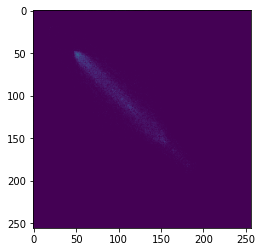

In [8]:
plt.imshow(toglcm(rgb2gs1(img.imread(path(dg_thermograms_names[150])))))
plt.show()
plt.imshow(toglcm(rgb2gs1(img.imread(path(dg_thermograms_names[0])))))
plt.show()

# Part 2.a : Understanding GLCM
## Gray Scale Co-occurance Matrix




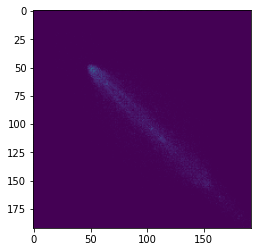

In [9]:
import math

def angle(x, y, theta):
    assert theta % 45 == 0
    d = 1
    if theta % 45 == 0 and not theta % 90 == 0: d = math.sqrt(2)
    theta = theta * (math.pi / 180)
    y1 = y - math.floor(d * math.sin(theta))
    x1 = x + math.floor(d * math.cos(theta))
    return (x1, y1)
def _toglcm(img, ang):
    max = img.reshape(-1, ).max() + 1
    glcm = [[0 for i in range(max)] for _ in range(max)]
    glcm = np.array(glcm, dtype=np.uint8)

    for y in range(img2.shape[1]):
        for x in range(img2.shape[0]):
            val = img2[x][y]
            x1, y1 = angle(x, y, ang)
            if x1 < 0 or y1 < 0 or x1 >= img2.shape[0] or y1 >= img2.shape[1] : continue
            val1 = img2[x1][y1]
            glcm[val1][val] += 1
            glcm[val][val1] += 1 

    return glcm
glcm2 = _toglcm(img2, 45)
plt.imshow(glcm2)

In [209]:
from collections import Counter
def getprops(img, distance=1, angle=45):
    gimg = img.convert("L")
    gimg_v = np.array(gimg, dtype=np.uint8)
    glcm = graycomatrix(gimg_v, distances=[distance], angles=[angle], levels=256, normed=True)
    props = [ 0 ] * 5
    props[0] = graycoprops(glcm, "contrast").reshape(-1, )[0]
    props[1] = graycoprops(glcm, "homogeneity").reshape(-1, )[0]
    props[2] = graycoprops(glcm, "energy").reshape(-1, )[0]
    props[3] = graycoprops(glcm, "ASM").reshape(-1, )[0]
    props[4] = graycoprops(glcm, "correlation").reshape(-1, )[0]
    
    k = gimg_v.reshape(-1, ) 
    d = Counter(k)
    P = lambda x : d.get(x, 1/len(k)) / len(k)
    
    mean = np.sum([ g * P(g) for g in range(256) ])
    varr = np.sum([ (g - mean)**2 * P(g) for g in range(256) ])
    entropy = np.sum([ P(g) * math.log2(P(g)) for g in range(256) ])
    skew = np.sum([((1 / varr ** 3) * (( g - mean) ** 3) * P(g)) for g in range(256)])
    kurtosis = 0
    props += [ mean, varr, entropy, skew, kurtosis ]
    
    return props

In [208]:
import pandas as pd
from PIL import Image

def getData(path_names, distance=6, angle=45):
    data = []
    true_label = []
    paths = []
    for i, x in enumerate(path_names):
        if not x.endswith(".png"): continue
        img_path = path(x)
        props = getprops(Image.open(img_path), distance, angle)
        true_label += [ 1 if "DM" in img_path else 0 ]
        data += [ props ]
        paths += [ img_path ]

    data = np.array(data)
    true_label = np.array(true_label)
    paths = np.array(paths)
    df = pd.DataFrame({
    "contrast" : data[:, 0],
    "homogeneity" : data[:, 1],
    "energy" : data[:, 2],
    "ASM" : data[:, 3],
    "correlation" : data[:, 4],
    "mean" : data[:, 5],
    "varr": data[:, 6],
    "entropy": data[:, 7],
    "skew": data[:, 8],
    #"kurtosis" : data[:, 9],
    "infected": true_label,
    "paths": paths
    })
    return df

In [122]:
df = getData(thermograms_names)

In [123]:
from sklearn.utils import resample

def balancedf(df):
    infected_class = df[df["infected"] == 1]
    normal_class = df[df["infected"] == 0]
    min_count = df["infected"].value_counts().min()
    resample_infected = resample(infected_class, replace=True, n_samples=min_count, random_state=1337)

    bdf = pd.concat([normal_class, resample_infected])
    return bdf

bdf = balancedf(df)

In [125]:
from sklearn.model_selection import train_test_split as tts

def gettts(bdf):
    cols = bdf.columns[:len(bdf.columns) - 2]
    x_train, x_test, y_train, y_test = tts(bdf[cols],bdf[["infected", "paths"]], test_size=0.3, random_state=1337)
    return x_train, x_test, y_train, y_test

x_train, x_test, y_train, y_test = gettts(bdf)

In [202]:
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score


def eval_model(model, name, bdf, metrics):
    x_train, x_test, y_train, y_test = gettts(bdf)
    model.fit(x_train, y_train["infected"])
    y_pred = model.predict(x_test)
    accs = metrics.get("accuracy", {})
    prec = metrics.get("prec", {})
    recall = metrics.get("recall", {})
    f1 = metrics.get("f1-score", {})
    
    if len(accs) == 0:
        metrics["accuracy"] = accs
        metrics["prec"] = prec
        metrics["recall"] = recall
        metrics["f1-score"] = f1
    
    accs_vals = accs.get(name, [])
    prec_vals = prec.get(name, [])
    recall_vals = recall.get(name, [])
    f1_vals = f1.get(name, [])
    
    if len(accs_vals) == 0:
        accs[name] = accs_vals
        prec[name] = prec_vals
        recall[name] = recall_vals
        f1[name] = f1_vals
    
    accs_vals.append(accuracy_score(y_test["infected"], y_pred))
    prec_vals.append(precision_score(y_test["infected"], y_pred))
    recall_vals.append(recall_score(y_test["infected"], y_pred))
    f1_vals.append(f1_score(y_test["infected"], y_pred))
    
    
    return model

In [158]:
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier as DTC

In [159]:
accs = metrics["accuracy"]

import matplotlib.pyplot as plt
import seaborn as sea


save_path="/home/someone/svnit/mtech/sem3/research/ppts/"




In [151]:
def barplot(metrics,name, save=False,color=["red", "blue", "cyan"]):
    fig, ax = plt.subplots()
    bars = ax.bar(metrics.keys(), metrics.values(), color=color)
    for bar in bars:
        ax.text(bar.xy[0] + bar.get_width() / 2, bar.get_height(),"%1.1f"%(bar.get_height() * 100), ha="center", va="bottom")
    if save: fig.savefig(f"{save_path}{name}.png")

In [235]:
distances = [ *range(1,10) ]
angles = [0, 45, 90, 135, 180, 225, 270, 315, 360]

In [236]:
met = []

knn_model = KNN(n_neighbors=5)
svm_model = SVC()
dt_model = DTC()

'''
distance_varr = {}
for distance in distances:
    data = getData(thermograms_names, distance)
    bdf_ = balancedf(data)
    eval_model(knn_model, "KNN", bdf_, distance_varr)
    eval_model(svm_model, "SVM", bdf_, distance_varr)
    eval_model(dt_model, "DTC", bdf_, distance_varr)
''' 

angle_varr = {}

for angle in angles:
    data = getData(thermograms_names, angle)
    bdf_ = balancedf(data)
    eval_model(knn_model, "KNN", bdf_, angle_varr)
    eval_model(svm_model, "SVM", bdf_, angle_varr)
    eval_model(dt_model, "DTC", bdf_, angle_varr)
    

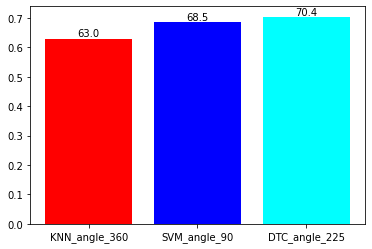

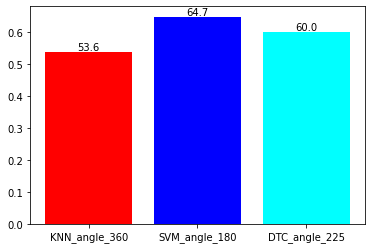

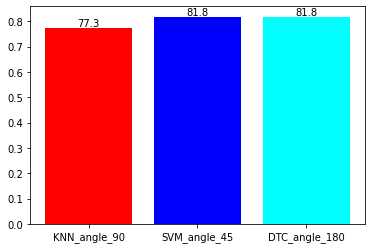

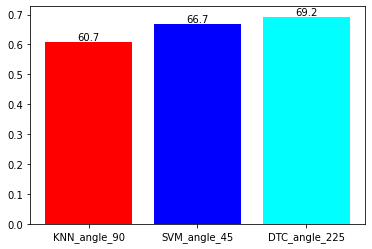

In [241]:
def plotMaxMetrics(metrics, metric_name, optimum_param, optimum=None):
    n_met = []
    models_scores = tmp[metric_name]
    for model_name in models_scores.keys():
        model_metrics = models_scores[model_name]
        ix, max_x = np.argmax(model_metrics), max(model_metrics)
        n_met += [ (model_name, ix, max_x) ]

    args_dict = {}
    for x in n_met:
        model_name, index, max_x = x
        optimum_arg = index + 1
        if optimum :
            optimum_arg = optimum[index]
        args_dict[f"{model_name}_{optimum_param}_{optimum_arg}"] = max_x
    
    barplot(args_dict,f"{metric_name}_{optimum_param}", True)

plotMaxMetrics(angle_varr, "accuracy", "angle", angles)
plotMaxMetrics(angle_varr, "prec", "angle", angles)
plotMaxMetrics(angle_varr, "recall", "angle", angles)
plotMaxMetrics(angle_varr, "f1-score", "angle", angles)

Text(0, 0.5, 'accuracy')

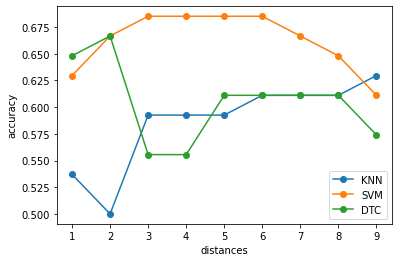

In [195]:
fig, ax = plt.subplots()
ax.plot(distances, knn_accs, "o-", label="KNN")
ax.plot(distances, svm_accs, "o-", label="SVM")
ax.plot(distances, dt_accs, "o-", label="DTC")
ax.legend()


ax.set_xlabel("distances")
ax.set_ylabel("accuracy")

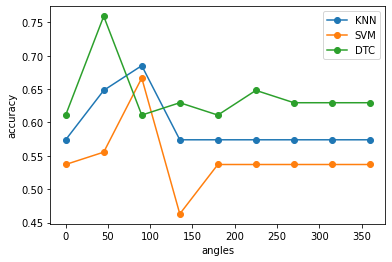

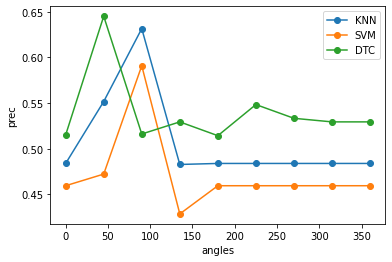

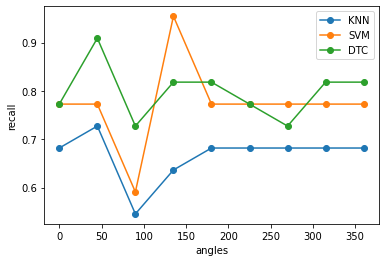

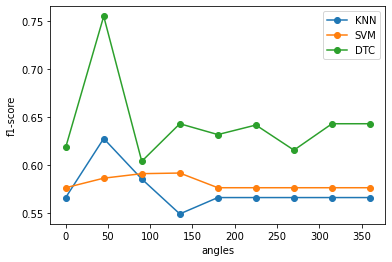

In [239]:
def plotLines(metrics, vs, vs_name):
    for metric_name, metric in metrics.items():
        fig, ax = plt.subplots()
        ax.set_xlabel(vs_name)
        ax.set_ylabel(metric_name)
        for model_name, values in metric.items():
            ax.plot(vs, values, "o-", label=model_name)
        
        ax.legend()
        fig.savefig(f"{save_path}{metric_name}_{vs_name}_varr.png")

plotLines(angle_varr, angles, "angles")
            